#  Documentation

## Objective
This project aims to predict the placement activity of students knowing their marks in the 5 semesters, their gender, college, fields of study, and the value of the scholarship.

Placement activity is the assignment of an employee to a job depending on the category of the society where he is assigned: 
 - A: if the student works for a high rated company
 - C: if the student works for a medium rated company

## Steps

1. First we import data and used libraries( keras, sklearn, numpy, matplotlib, and pandas)

2. Data preprocessing which includes:
    *  Harmonize coding of Gender columns (F to Female, M to Male)
    *  Create dummy variables for Gender female and male (Female column will take 1 if the student is female else 0)
    * From college code, 4 dummy variable was created: encode college code values as integers then these integers were converted to dummy variables using one-hot encoding techniques with LabelEncoder functions from sklearn.preprocessing models 
    *  From Field_study, 4 dummy variable was created, with the same method as the college code



3.  Normalization of features to values between 0 and 1 using MinMaxScaler function from sklearn.preprocessing models 

4.  Placement activity was encoded to dummy variables 

5. Build the deep learning model

6. Use Keras Classifier for the training of the model 

7. Evaluate the model with k-Fold Cross-Validation

8. Visualization of the repartition of placement activities based on other characteristics (Gender, Field of study, scholarship, college code)

#  Import librairies

In [1]:
#Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# Set seed numbers for reproductibilty of the results
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Import data 

In [5]:
data=pd.read_csv('data.csv',header=0, delimiter=",")

In [6]:
data.head()

,1st,2nd,3rd,4th,5th,Placement_activity,Gender,college_code,Fields_of_Study,scholarship
0,5.64,5.68,7.28,7.47,4.89,C,Male,241,Environmental Science and Health,0.00
1,3.05,4.87,5.82,4.76,7.75,D,Male,241,Art,0.00
2,7.27,7.91,7.84,8.60,6.53,E,F,115,Economics,0.00
3,8.60,8.08,7.91,7.20,6.66,A,Male,116,Environmental Science and Health,0.00
4,5.81,5.45,5.36,4.60,8.19,C,Female,116,Public Relations and Administration,1488.27


In [7]:
data.shape

(10000, 10)

# Data Preprocessing

#### Gender

In [8]:
# Aggregation by gender
data.groupby('Gender').count()

,1st,2nd,3rd,4th,5th,Placement_activity,college_code,Fields_of_Study,scholarship
Gender,,,,,,,,,
F,2572,2572,2572,2572,2572,2572,2572,2572,2572
Female,2462,2462,2462,2462,2462,2462,2462,2462,2462
M,2452,2452,2452,2452,2452,2452,2452,2452,2452
Male,2514,2514,2514,2514,2514,2514,2514,2514,2514


In [9]:
# Replace F and M by Female and Male
data["Gender"].replace({"F": "Female", "M": "Male"}, inplace=True)

In [10]:
data.groupby('Gender').count()

,1st,2nd,3rd,4th,5th,Placement_activity,college_code,Fields_of_Study,scholarship
Gender,,,,,,,,,
Female,5034,5034,5034,5034,5034,5034,5034,5034,5034
Male,4966,4966,4966,4966,4966,4966,4966,4966,4966


#### College Code

<AxesSubplot:>

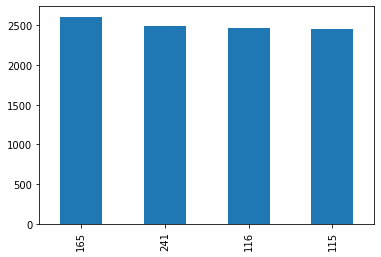

In [11]:
data['college_code'].value_counts().plot(kind='bar')

In [12]:
# encode college code values as integers
college_code=data[['college_code']]
encoder = LabelEncoder()
encoder.fit(college_code)
encoded_college_code = encoder.transform(college_code)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_college_code = np_utils.to_categorical(encoded_college_code)

C:\Users\yosra\.conda\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
encoded_college_code

array([3, 3, 0, ..., 2, 2, 2], dtype=int64)

In [14]:
dummy_college_code

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [15]:
df_college_code = pd.DataFrame(dummy_college_code,columns=['c1','c2','c3','c4'])

In [16]:
data['college1']=df_college_code[['c1']]
data['college2']=df_college_code[['c2']]
data['college3']=df_college_code[['c3']]
data['college4']=df_college_code[['c4']]

#### Fields of Study

<AxesSubplot:>

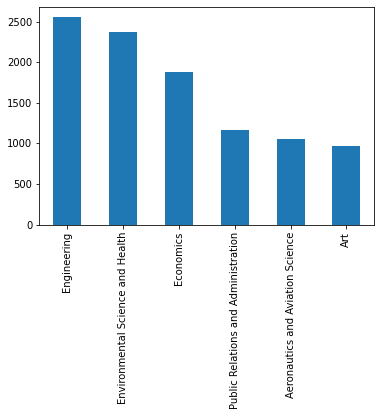

In [17]:
data['Fields_of_Study'].value_counts().plot(kind='bar')

In [18]:
# Aggregation by Subject code
data.groupby('Fields_of_Study').count()

,1st,2nd,3rd,4th,5th,Placement_activity,Gender,college_code,scholarship,college1,college2,college3,college4
Fields_of_Study,,,,,,,,,,,,,
Aeronautics and Aviation Science,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
Art,969,969,969,969,969,969,969,969,969,969,969,969,969
Economics,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879
Engineering,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552
Environmental Science and Health,2379,2379,2379,2379,2379,2379,2379,2379,2379,2379,2379,2379,2379
Public Relations and Administration,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167


In [19]:
# encode college code values as integers
Fields_of_Study=data[['Fields_of_Study']]
encoder = LabelEncoder()
encoder.fit(Fields_of_Study)
encoded_Fields_of_Study = encoder.transform(Fields_of_Study)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_Fields_of_Study = np_utils.to_categorical(encoded_Fields_of_Study)
df_Fields_of_Study = pd.DataFrame(dummy_Fields_of_Study,columns=['AAS','Art','Economics','Engineering','ESH','PRA'])
# Create new varaibles 
data['AAS']=df_Fields_of_Study[['AAS']]
data['Art']=df_Fields_of_Study[['Art']]
data['Economics']=df_Fields_of_Study[['Economics']]
data['Engineering']=df_Fields_of_Study[['Engineering']]
data['ESH']=df_Fields_of_Study[['ESH']]
data['PRA']=df_Fields_of_Study[['PRA']]

C:\Users\yosra\.conda\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Gender varaible

<AxesSubplot:>

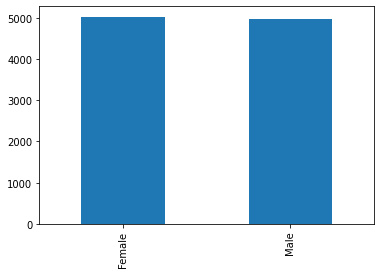

In [20]:
data['Gender'].value_counts().plot(kind='bar')

In [21]:
#Create dummy varaible for gender
#Female column takes 1 if gender is female else it takes 0 
#Male column  takes 1 if gender is male else it takes 0 

data["Female"]=data["Gender"]
data["Female"].replace({"Female": 1, "Male": 0}, inplace=True)

data["Male"]=data["Gender"]
data["Male"].replace({"Male": 1, "Female": 0}, inplace=True)

In [22]:
data.groupby('Female').count()['Gender']

Female
0    4966
1    5034
Name: Gender, dtype: int64

### Select data columns

In [23]:
data2=data[['1st','2nd','3rd','4th','5th','college1','college2','college3','college4','Female','scholarship','AAS','Art','Economics','Engineering','ESH','PRA','Placement_activity']]

In [24]:
data2.describe()

,1st,2nd,3rd,4th,5th,college1,college2,college3,college4,Female,scholarship,AAS,Art,Economics,Engineering,ESH,PRA
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.943053,5.750360,6.077147,6.281625,6.811393,0.24480,0.245800,0.260800,0.248600,0.503400,2278.693755,0.105400,0.096900,0.187900,0.255200,0.237900,0.116700
std,1.761993,1.438323,1.511760,1.599145,1.643991,0.42999,0.430582,0.439093,0.432223,0.500013,4234.727342,0.307083,0.295836,0.390652,0.435995,0.425819,0.321079
min,2.890000,3.250000,3.480000,3.500000,4.010000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.410000,4.520000,4.770000,4.900000,5.380000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.950000,5.730000,6.070000,6.300000,6.810000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.450000,6.990000,7.390000,7.670000,8.220000,0.00000,0.000000,1.000000,0.000000,1.000000,2511.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.000000,8.250000,8.690000,9.030000,9.700000,1.00000,1.000000,1.000000,1.000000,1.000000,15324.540000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data2.head(2)

,1st,2nd,3rd,4th,5th,college1,college2,college3,college4,Female,scholarship,AAS,Art,Economics,Engineering,ESH,PRA,Placement_activity
0,5.64,5.68,7.28,7.47,4.89,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C
1,3.05,4.87,5.82,4.76,7.75,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,D


#### Split the data into input (X) and output (y) variables

In [29]:

X = data2[['1st','2nd','3rd','4th','5th','college1','college2','college3','college4','Female','scholarship','AAS','Art','Economics','Engineering','ESH','PRA']] #,'College Code'
y = data2[['Placement_activity']]

In [30]:
# dimention of the input (columns number)
n_dim=X.shape[1]
print(n_dim)

17


In [31]:
X.head(2)

,1st,2nd,3rd,4th,5th,college1,college2,college3,college4,Female,scholarship,AAS,Art,Economics,Engineering,ESH,PRA
0,5.64,5.68,7.28,7.47,4.89,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.05,4.87,5.82,4.76,7.75,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
# Normalize features within range 0 (minimum) and 1 (maximum)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

### Encode The Output Variable

The output variable is a categorical variable that takes [A,B,C,D,E,F] as values

In [33]:
# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

C:\Users\yosra\.conda\envs\tf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
dummy_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [35]:
# Number of classes
n_class=dummy_y.shape[1]
print(n_class)

5


In [36]:
dummy_y[0:4]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Modeling

In [38]:
seed_value=124

The Neural Network Model can be summarized as:

[n_dim inputs] -> [ hidden nodes] -> [5 outputs]

The “softmax” activation function should be used in the output layer. This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.

Finally, the network uses the efficient Adam gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.

In [39]:
n_dim,n_class

(17, 5)

In [37]:
# First define baseline model. Then use it in Keras Classifier for the training
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(15, input_dim = n_dim, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(n_class, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [38]:
model=baseline_model()
y_prob = model.predict(X) 
y_classes = y_prob.argmax(axis=-1)

In [43]:
conditions = [y_classes==0, y_classes==1,  y_classes==2,  y_classes==3, y_classes==4]
choices = ["A","B","C","D","E"]
predicted_class = np.select(conditions, choices)

In [40]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 200, batch_size = 10, verbose = 0)

###  Evaluate The Model with k-Fold Cross Validation

In [45]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [46]:
# Object to describe the result
results = cross_val_score(estimator, X, dummy_y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Result: 30.77% (0.76%)


In [52]:
results

array([0.29350001, 0.31299999, 0.3145    , 0.30649999, 0.31099999])

### Visualization of the predicted placement activity based on other variables

In [58]:
import seaborn as sns

In [53]:
data['predicted_Placement_activity']=predicted_class

### Repartition of the Placement activity By Gender

In [54]:
Repartition_Placement_activityByGender = data.groupby('Gender')['predicted_Placement_activity'].value_counts(normalize=True)
Repartition_Placement_activityByGender = Repartition_Placement_activityByGender.mul(100).rename('Percent').reset_index()

In [55]:
data.groupby(['Gender','predicted_Placement_activity']).count()

1st   2nd   3rd   4th   5th  \
Gender predicted_Placement_activity                                 
Female A                              637   637   637   637   637   
       B                                2     2     2     2     2   
       C                             4359  4359  4359  4359  4359   
       D                               36    36    36    36    36   
Male   A                              383   383   383   383   383   
       C                             4574  4574  4574  4574  4574   
       D                                9     9     9     9     9   

                                     Placement_activity  college_code  \
Gender predicted_Placement_activity                                     
Female A                                            637           637   
       B                                              2             2   
       C                                           4359          4359   
       D                                             36            36   
Male   A                                            383           383   
       C                                           4574          4574   
       D                                              9             9   

                                     Fields_of_Study  scholarship  college1  \
Gender predicted_Placement_activity                                           
Female A                                         637          637       637   
       B                                           2            2         2   
       C                                        4359         4359      4359   
       D                                          36           36        36   
Male   A                                         383          383       383   
       C                                        4574         4574      4574   
       D                                           9            9         9   

                                     ...  college3  college4   AAS   Art  \
Gender predicted_Placement_activity  ...                                   
Female A                             ...       637       637   637   637   
       B                             ...         2         2     2     2   
       C                             ...      4359      4359  4359  4359   
       D                             ...        36        36    36    36   
Male   A                             ...       383       383   383   383   
       C                             ...      4574      4574  4574  4574   
       D                             ...         9         9     9     9   

                                     Economics  Engineering   ESH   PRA  \
Gender predicted_Placement_activity                                       
Female A                                   637          637   637   637   
       B                                     2            2     2     2   
       C                                  4359         4359  4359  4359   
       D                                    36           36    36    36   
Male   A                                   383          383   383   383   
       C                                  4574         4574  4574  4574   
       D                                     9            9     9     9   

                                     Female  Male  
Gender predicted_Placement_activity                
Female A                                637   637  
       B                                  2     2  
       C                               4359  4359  
       D                                 36    36  
Male   A                                383   383  
       C                               4574  4574  
       D                                  9     9  

[7 rows x 21 columns]

In [56]:
Repartition_Placement_activityByGender

,Gender,predicted_Placement_activity,Percent
0,Female,C,86.591180
1,Female,A,12.653953
2,Female,D,0.715137
3,Female,B,0.039730
4,Male,C,92.106323
5,Male,A,7.712445
6,Male,D,0.181232


posx and posy should be finite values
posx and posy should be finite values


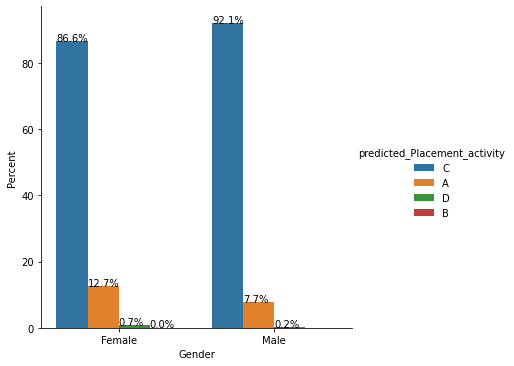

In [59]:
g = sns.catplot(x='Gender', y='Percent', hue='predicted_Placement_activity', kind='bar', data=Repartition_Placement_activityByGender)
m=max(Repartition_Placement_activityByGender.Percent)+5
g.ax.set_ylim(0,m)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



posx and posy should be finite values
posx and posy should be finite values


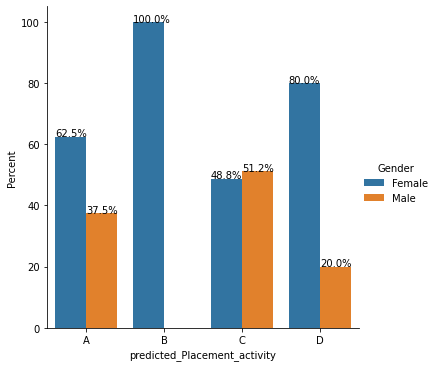

In [60]:
Repartition_GenderByPlacement_activity = data.groupby('predicted_Placement_activity')['Gender'].value_counts(normalize=True)
Repartition_GenderByPlacement_activity = Repartition_GenderByPlacement_activity.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='predicted_Placement_activity', y='Percent', hue='Gender', kind='bar', data=Repartition_GenderByPlacement_activity)
m=max(Repartition_GenderByPlacement_activity.Percent)+5
g.ax.set_ylim(0,m)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Repartition of the Placement activity By college code

(0.0, 105.0)

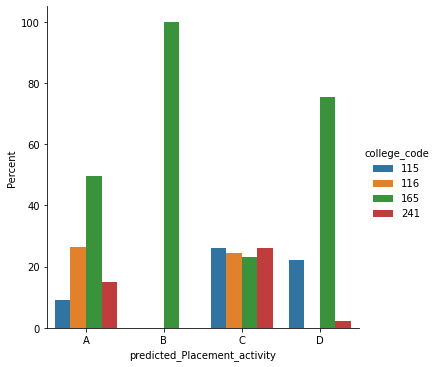

In [61]:
Repartition_college_codeByPlacement_activity = data.groupby('predicted_Placement_activity')['college_code'].value_counts(normalize=True)
Repartition_college_codeByPlacement_activity = Repartition_college_codeByPlacement_activity.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='predicted_Placement_activity', y='Percent', hue='college_code', kind='bar', data=Repartition_college_codeByPlacement_activity)
m=max(Repartition_college_codeByPlacement_activity.Percent)+5
g.ax.set_ylim(0,m)


In [62]:
Repartition_college_codeByPlacement_activity

,predicted_Placement_activity,college_code,Percent
0,A,165,49.705882
1,A,116,26.274510
2,A,241,15.000000
3,A,115,9.019608
4,B,165,100.000000
5,C,115,26.262174
6,C,241,26.105452
7,C,116,24.515840
8,C,165,23.116534
9,D,165,75.555556


### Repartition of the Placement activity By Fields of Study

(0.0, 105.0)

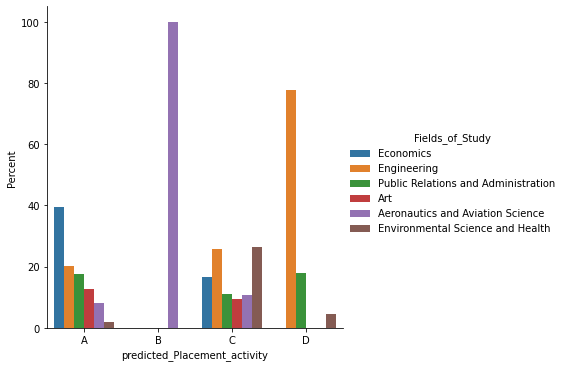

In [63]:
Repartition_Fields_of_StudyByPlacement_activity = data.groupby('predicted_Placement_activity')['Fields_of_Study'].value_counts(normalize=True)
Repartition_Fields_of_StudyByPlacement_activity = Repartition_Fields_of_StudyByPlacement_activity.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='predicted_Placement_activity', y='Percent', hue='Fields_of_Study', kind='bar', data=Repartition_Fields_of_StudyByPlacement_activity)
m=max(Repartition_Fields_of_StudyByPlacement_activity.Percent)+5
g.ax.set_ylim(0,m)


In [64]:
### Repartition of the Placement activity By scholarship

In [65]:
#Create a new variable scholarshipB (Boolean scholarship) that takes 1 if the scholarship is different of zero else 0
data['scholarshipB']=list(map(int,data['scholarship']!=0))

In [66]:
Repartition_scholarshipByPlacement_activity = data.groupby('predicted_Placement_activity')['scholarshipB'].value_counts(normalize=True)
Repartition_scholarshipByPlacement_activity = Repartition_scholarshipByPlacement_activity.mul(100).rename('Percent').reset_index()


In [67]:
Repartition_scholarshipByPlacement_activity

,predicted_Placement_activity,scholarshipB,Percent
0,A,1,61.470588
1,A,0,38.529412
2,B,0,100.000000
3,C,0,73.592298
4,C,1,26.407702
5,D,0,68.888889
6,D,1,31.111111


(0.0, 105.0)

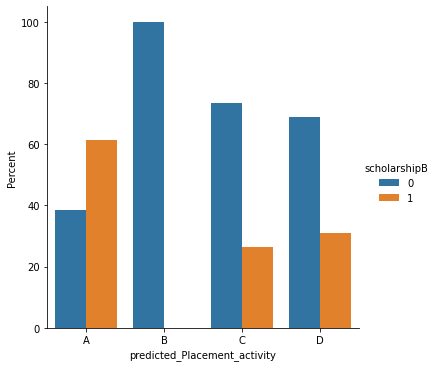

In [68]:
g = sns.catplot(x='predicted_Placement_activity', y='Percent', hue='scholarshipB', kind='bar', data=Repartition_scholarshipByPlacement_activity)
m=max(Repartition_scholarshipByPlacement_activity.Percent)+5
g.ax.set_ylim(0,m)